## MCMC using Ising model 

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import holoviews as hv 
hv.extension('bokeh')

In [2]:
# Get MNIST digits
data = load_digits().data

# Binarize digits
binarized = (data > 1).astype(np.int8)

In [3]:
# Reshape
binary = binarized.reshape(-1, 8,8)

In [4]:
def generate_rand_ix_2d(len_image):
    return (np.random.choice(len_image), np.random.choice(len_image))

In [7]:
def get_neighbors(image, rand_ix):

    "Get the neighbors for a given pixel "

    # Get side length of image
    l = image.shape[0]
    
    # Clipping allows us to generalize for edge and corner pixels 
    
    left_ix = np.clip(rand_ix[0] - 1, a_min = 0, a_max = l)
    right_ix = np.clip(rand_ix[0]+2, a_min = 0, a_max = l)
    bottom_ix = np.clip(rand_ix[1] - 1, a_min = 0, a_max = l)
    top_ix = np.clip(rand_ix[1] + 2, a_min = 0, a_max =l)

    return image[left_ix: right_ix, bottom_ix : top_ix]

In [30]:
def mcmc_step(image, beta): 
    
    "Wrapper to perform an MCMC step using an Ising model."
    
    rand_ix = generate_rand_ix_2d(image.shape[0])
    
    neighbors = get_neighbors(image, rand_ix)
    
    # Compute indicator r.v. using numpy magic
    indicator_old = neighbors == image[rand_ix]
    
    # Compute a new indicator rv with the proposed change
    indicator_proposed = neighbors == np.abs(image[rand_ix] -1) 
    
    # Compute old Ising factor, correct for comparison of pixel with itself  
    ising_factor= np.sum(indicator_old) - 1
    
    # New ising factor doesn't need adjustment 
    ising_factor_new = np.sum(indicator_proposed)  
    
    #px_old = np.exp(beta * ising_factor) 
    #px_new = np.exp(beta * ising_factor_new)
    
    # Compute Metropolis ratio 
    hastings_ratio = np.exp(beta * (ising_factor_new - ising_factor))  #px_new / px_old
    
    #print('Hastings ratio : {} \n'.format(hastings_ratio))
    
    u = np.random.random()
    
    accept = True if u < min(1, hastings_ratio) else False 
    
    if accept : 
        
        image[rand_ix] = np.abs(image[rand_ix] - 1)
        
        #print('Proposal accepted \n')
        
    else : 
        pass 
        
        #print('Proposal denied \n')
    
    return image
    

In [15]:
im = binary[0]

In [11]:
hv.Image(im)

:Image   [x,y]   (z)

In [16]:
new_im = mcmc_step(im, beta = 1)

In [20]:
import matplotlib.pyplot as plt

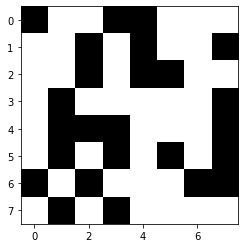

In [36]:
im = binary[0]

for i in range(100): 
    #plt.figure()
    im = mcmc_step(im, beta = 0.01)

plt.imshow(im, cmap = 'bone')

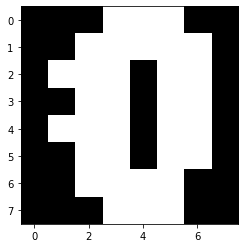

In [106]:
im = binary[10].copy()

plt.imshow(im, cmap = 'bone')

In [116]:
n_iter = 100

In [126]:
def run_mcmc_and_plot(image, beta_, n_iter): 
    """Given an image, it returns the n_iter-th sample using MCMC."""
    im_ = im.copy()
    for i in range(n_iter): 
        #plt.figure()
        im_ = mcmc_step(im_, beta = beta_)

    fig, ax = plt.subplots(1, 2, figsize = (8, 4))

    ax[0].imshow(im, cmap = 'Blues')
    ax[0].set_title('Original image') 

    ax[1].imshow(im_, cmap = 'Blues')
    ax[1].set_title('Generated image after {0} its, beta = {1}'.format(n_iter, np.round(beta_, 2)))

In [131]:
im = binary[-10]

/Users/manoloflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


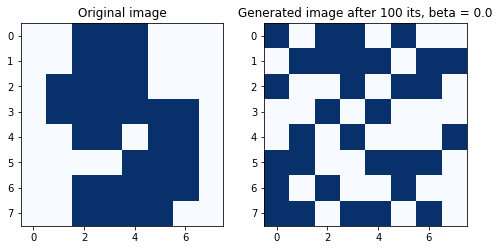

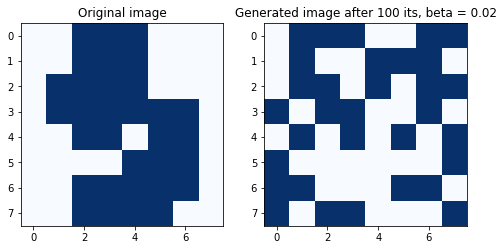

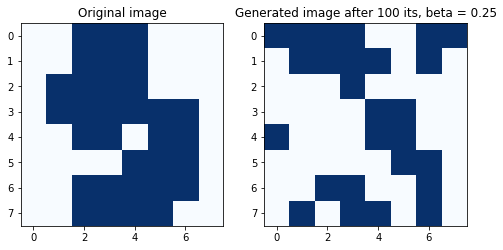

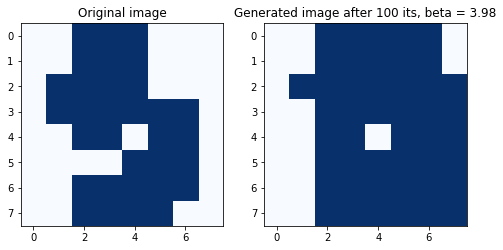

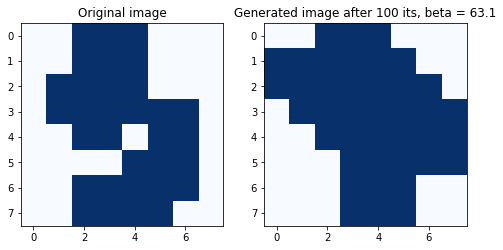

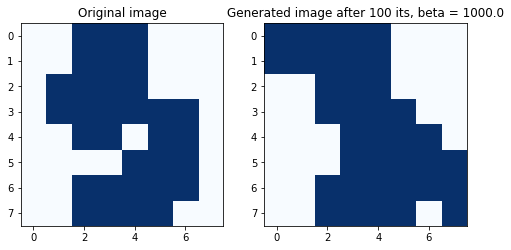

In [132]:
for beta_ in np.logspace(-3, 3, 6): 
    run_mcmc_and_plot(im, beta_, n_iter = 100)